In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
path = os.path.dirname(os.getcwd()) + "/spectrogram/"

hf = h5py.File(path + "4-0-15.h5", 'r')

spectrograms = np.array(hf.get('spectograms'))
targets = np.array(hf.get('targets')).astype(np.long)
hf.close()
print(spectrograms.shape)

(180, 129, 155)


/tmp/ipykernel_10583/1189450043.py:6: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  targets = np.array(hf.get('targets')).astype(np.long)


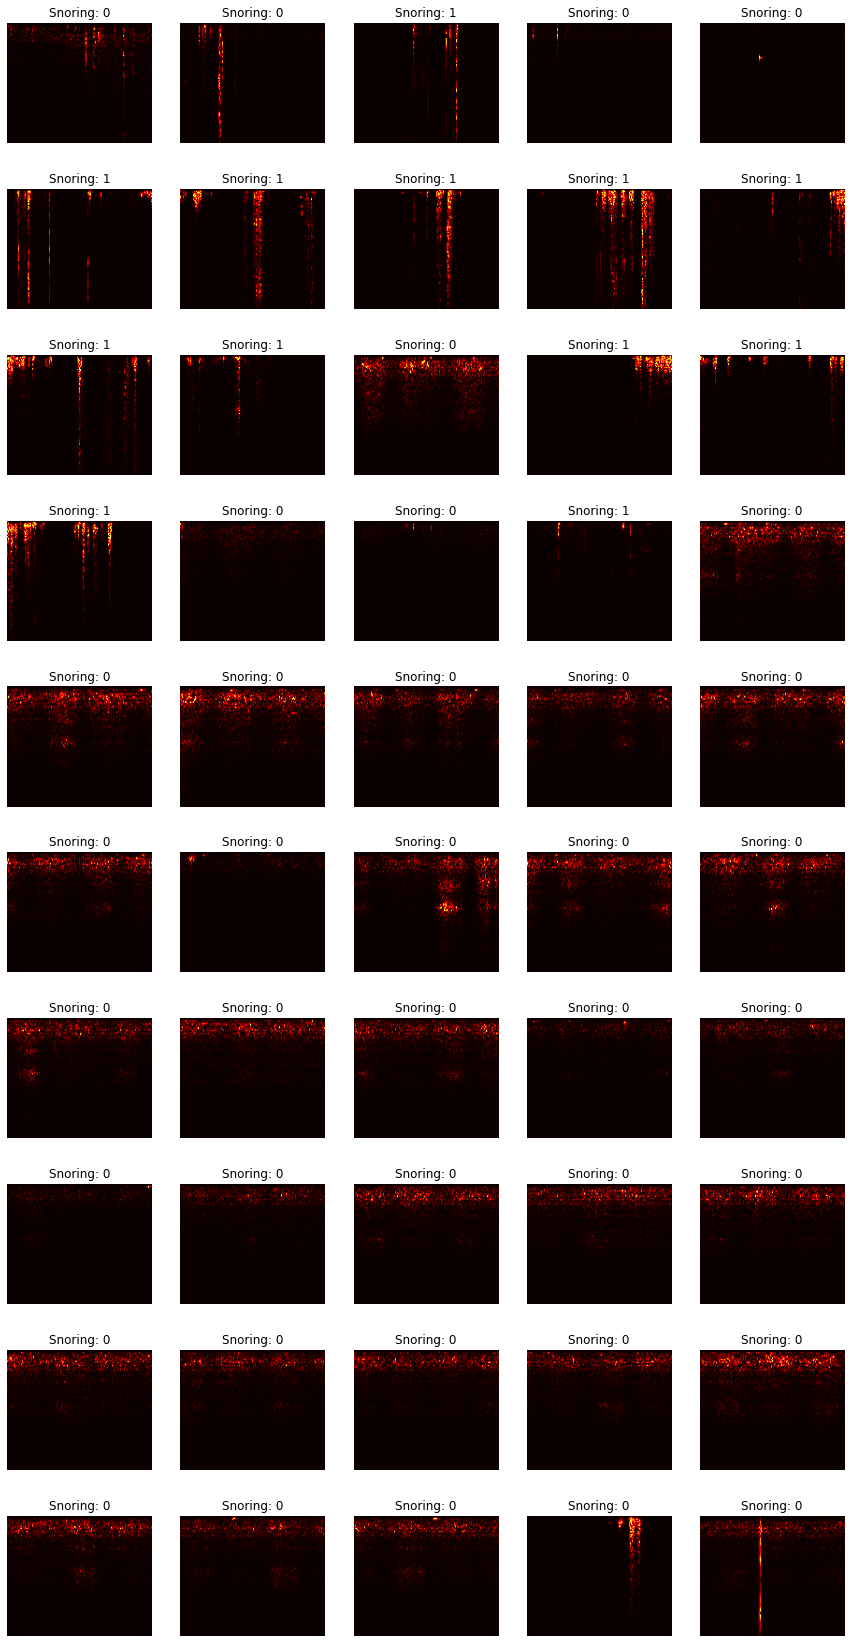

In [21]:
fig=plt.figure(figsize=(15, 30))
columns = 5
rows = 10
for i in range(1, columns*rows +1):
    img = spectrograms[i + 0]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title("Snoring: " + str(targets[i + 0]))
    plt.imshow(img, cmap="hot")

plt.show()

In [17]:
train_data = np.empty(shape=(1, 129, 30))
train_labels = np.empty(shape=(1))
train_cls = np.empty(shape=(1))

test_data = np.empty(shape=(1, 129, 30))
test_labels = np.empty(shape=(1))
test_cls = np.empty(shape=(1))
for f in os.listdir(path):
    print(f)
    hf = h5py.File(path + f, 'r')
    spectrograms = np.array(hf.get('spectograms'))
    targets = np.array(hf.get('targets')).astype(np.long)
    cls = np.array(hf.get('class')).astype(np.long)
    hf.close()
    
    n = cls.shape[0]
    index = np.random.permutation(n)
    index_train = index[:int(4*n/5)]
    index_test = index[int(4*n/5):]
       
    train_spectrograms = spectrograms[index_train]
    test_spectrograms = spectrograms[index_test]
    train_targets = targets[index_train]
    test_targets = targets[index_test]
    train_class = cls[index_train]
    test_class = cls[index_test]

    
    
    train_data = np.concatenate([train_data, train_spectrograms])
    train_labels = np.concatenate([train_labels, train_targets])
    train_cls = np.concatenate([train_cls, train_class])
    
    test_data = np.concatenate([test_data, test_spectrograms])
    test_labels = np.concatenate([test_labels, test_targets])
    test_cls = np.concatenate([test_cls, test_class])

9-345-360.h5


/tmp/ipykernel_10583/1356435436.py:12: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  targets = np.array(hf.get('targets')).astype(np.long)
/tmp/ipykernel_10583/1356435436.py:13: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [5]:
print(train_data.shape)
print(train_labels.shape)
print(train_cls.shape)

hf = h5py.File(os.path.dirname(os.getcwd()) + "/data/snoring/train_snoring1s.h5", 'w')
hf.create_dataset('spectrograms', data=train_data[1:])
hf.create_dataset('targets', data=train_labels[1:])
hf.create_dataset('class', data=train_cls[1:])
hf.close()

print(test_data.shape)
print(test_labels.shape)
print(test_cls.shape)
hf = h5py.File(os.path.dirname(os.getcwd()) + "/data/snoring/test_snoring1s.h5", 'w')
hf.create_dataset('spectrograms', data=test_data[1:])
hf.create_dataset('targets', data=test_labels[1:])
hf.create_dataset('class', data=test_cls[1:])
hf.close()

(35632, 129, 30)
(35632,)
(35632,)
(8912, 129, 30)
(8912,)
(8912,)
